In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 5]

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
health_care = pd.read_csv('nchs_covid_mental_health_care.csv')

In [3]:
insurance = pd.read_csv('nchs_covid_health_insurance_coverage.csv')

### Data Explore

In [18]:
health_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               4116 non-null   object 
 1   Group                   4116 non-null   object 
 2   State                   4116 non-null   object 
 3   Subgroup                4116 non-null   object 
 4   Phase                   4116 non-null   object 
 5   Time Period             4116 non-null   int64  
 6   Time Period Label       4116 non-null   object 
 7   Time Period Start Date  4116 non-null   object 
 8   Time Period End Date    4116 non-null   object 
 9   Value                   4027 non-null   float64
 10  LowCI                   4027 non-null   float64
 11  HighCI                  4027 non-null   float64
 12  Confidence Interval     4027 non-null   object 
 13  Quartile Range          2856 non-null   object 
 14  Suppression Flag        5 non-null      

In [19]:
health_care['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Presence of Symptoms of Anxiety/Depression',
       'By Race/Hispanic ethnicity', 'By Education', 'By State'],
      dtype=object)

In [21]:
health_care['Time Period'].unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21,  1, 22, 23, 24, 25, 26],
      dtype=int64)

In [9]:
#inspect time period 1 
#health_care[health_care['Time Period'] == 20]

In [44]:
ins_df = insurance[insurance['Time Period'] >= 13]

In [25]:
insurance['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State'],
      dtype=object)

In [26]:
insurance['Subgroup'].unique()

array(['United States', '18 - 24 years', '25 - 34 years', '35 - 44 years',
       '45 - 64 years', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic white, single race',
       'Non-Hispanic black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsy

In [27]:
insurance['Time Period'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [28]:
ins_df['Time Period'].unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
      dtype=int64)

### Time Progress

In [29]:
#get all the unique week markers 
weeks = health_care["Time Period Label"].values
weeks = pd.unique(weeks)

In [10]:
#hard code the ordinal value to each week based on 16weeks from 2020 - 2021
#df_week_markers =pd.DataFrame({'Weeks':weeks,'Marks':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16]})

NameError: name 'weeks' is not defined

In [11]:
df_00 = health_care[(health_care['Indicator']=='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks') &
                    (health_care['Group']=='By Age')         
                   ]

In [12]:
df_00 = df_00[['Subgroup', 'Value', "Time Period Start Date",'Time Period']]

In [8]:
df_20 = df_00[(df_00['Time Period']== 20)]

In [35]:
df_00.isnull().sum()

Subgroup                  0
Value                     9
Time Period Start Date    0
Time Period               0
dtype: int64

In [21]:
df_20

,Subgroup,Value,Time Period Start Date,Time Period
2233,18 - 29 years,21.8,11/25/2020 12:00:00 AM,20
2234,30 - 39 years,17.2,11/25/2020 12:00:00 AM,20
2235,40 - 49 years,13.5,11/25/2020 12:00:00 AM,20
2236,50 - 59 years,9.5,11/25/2020 12:00:00 AM,20
2237,60 - 69 years,6.0,11/25/2020 12:00:00 AM,20
2238,70 - 79 years,3.2,11/25/2020 12:00:00 AM,20
2239,80 years and above,3.6,11/25/2020 12:00:00 AM,20


Text(0.5, 1.0, 'Proportions For Age Groups Who Needed Counseling or Therapy But Did Not Get It in Last 4 Weeks/ Time Period 20')

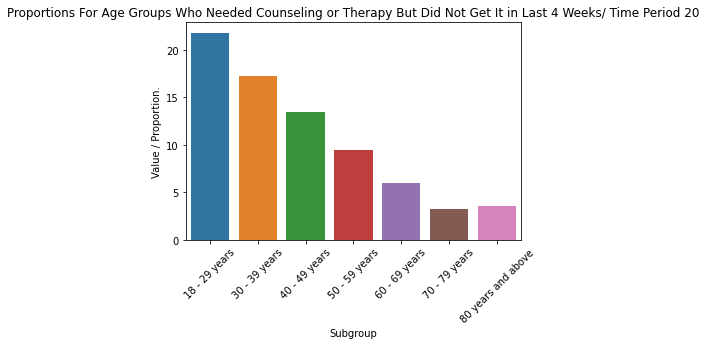

In [22]:
sns.barplot(x='Subgroup',y="Value",data= df_20);
plt.xticks(rotation=45);
plt.ylabel('Value / Proportion.')
plt.title('Proportions For Age Groups Who Needed Counseling or Therapy But Did Not Get It in Last 4 Weeks/ Time Period 20')

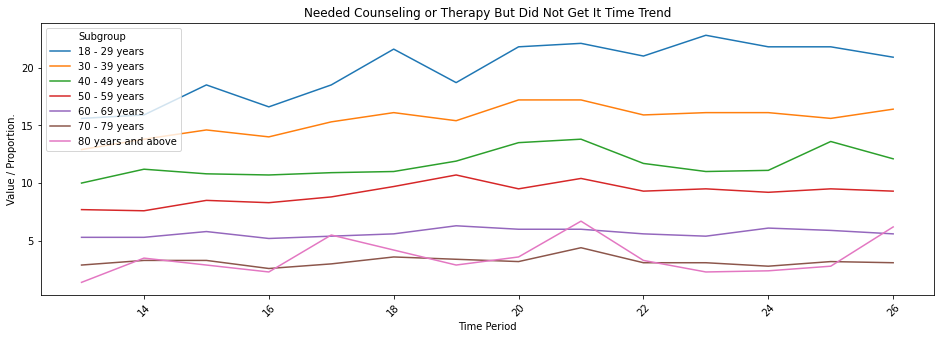

In [23]:
#plot
plt.figure(figsize= (16,5))
sns.lineplot(data=df_00, x="Time Period", y="Value", hue="Subgroup");
plt.title('Needed Counseling or Therapy But Did Not Get It Time Trend')
plt.ylabel('Value / Proportion.')
plt.xticks(rotation=45);

- 18-29 is most vonlunarible 
- there's a surge in consuling needs around week 16
- 80 years and above group has the most variation, there might be some time patterns with their needs in mental consuling 


In [37]:
#need to figure out how to correct order these 
time_table = df_00.groupby('Time Period').agg({'Value': 'sum'}).reset_index()
time_table

,Time Period,Value
0,1,0.0
1,13,55.8
2,14,60.6
3,15,61.5
4,16,59.7
5,17,67.4
6,18,67.6
7,19,69.3
8,20,74.8
9,21,80.6


### Age 

In [38]:
df_00.groupby('Subgroup').agg({'Value': 'sum'}).reset_index()

,Subgroup,Value
0,18 - 29 years,277.6
1,30 - 39 years,216.6
2,40 - 49 years,163.3
3,50 - 59 years,128.0
4,60 - 69 years,79.5
5,70 - 79 years,45.0
6,80 years and above,42.9


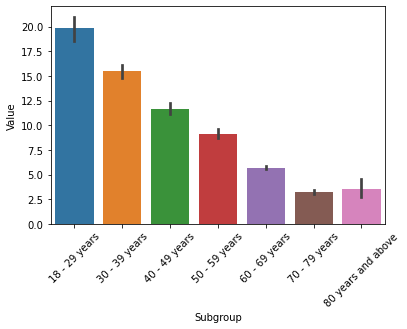

In [39]:
sns.barplot(x='Subgroup',y='Value',data= df_00);
plt.xticks(rotation=45);

In [27]:
needy_df = health_care[health_care['Indicator']=='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']

In [28]:
df_01 = needy_df[(needy_df['Group']=='By Age') |
                (needy_df['Group']== 'By Presence of Symptoms of Anxiety/Depression')]

In [29]:
df_01  = df_01[['Group','Subgroup', 'Value', "Time Period"]]

In [30]:
df_01['Subgroup'].unique()

array(['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years',
       '60 - 69 years', '70 - 79 years', '80 years and above',
       'Did not experience symptoms of anxiety/depression in the past 4 weeks',
       'Experienced symptoms of anxiety/depression in past 4 weeks'],
      dtype=object)

In [31]:
df_01 = df_01[df_01['Subgroup'] == 'Experienced symptoms of anxiety/depression in past 4 weeks']

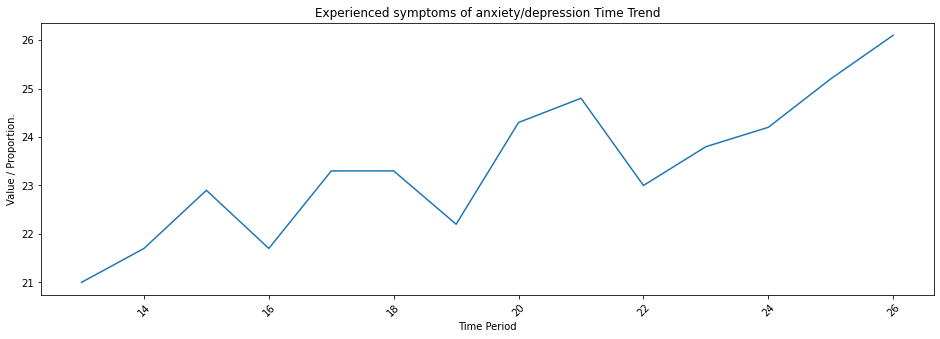

In [32]:
plt.figure(figsize= (16,5))
sns.lineplot(data= df_01, x="Time Period", y="Value");
plt.title('Experienced symptoms of anxiety/depression Time Trend')
plt.ylabel('Value / Proportion.');
plt.xticks(rotation=45);

In [46]:
df_01.groupby(['Group','Subgroup']).agg({'Value': ['sum']})

,,Value
,,sum
Group,Subgroup,
By Presence of Symptoms of Anxiety/Depression,Experienced symptoms of anxiety/depression in past 4 weeks,327.5


### Educational Level

In [34]:
df_02 = needy_df[needy_df['Group']=='By Education']

In [35]:
df_02  = df_02[['Subgroup', 'Value', "Time Period"]]

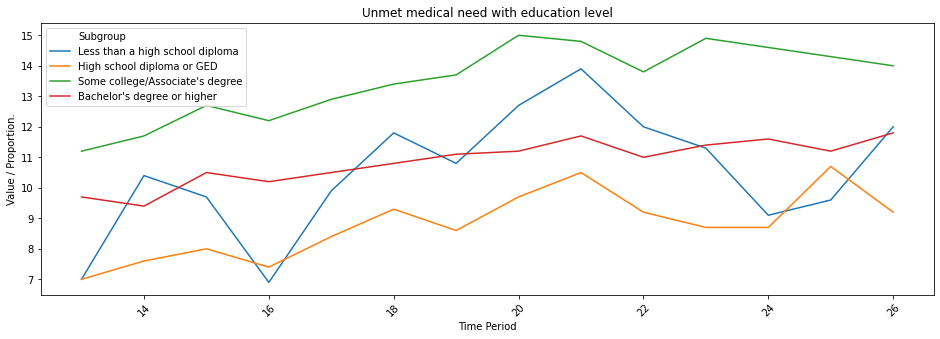

In [36]:
plt.figure(figsize= (16,5))
sns.lineplot(data= df_02, x="Time Period", y="Value", hue = 'Subgroup');
plt.title('Unmet medical need with education level')
plt.ylabel('Value / Proportion.');
plt.xticks(rotation=45);

### Racial

In [38]:
df_04 = needy_df[(needy_df['Group']=='By Race/Hispanic ethnicity')]

In [39]:
df_04 = df_04[['Subgroup', 'Value', 'Time Period']]

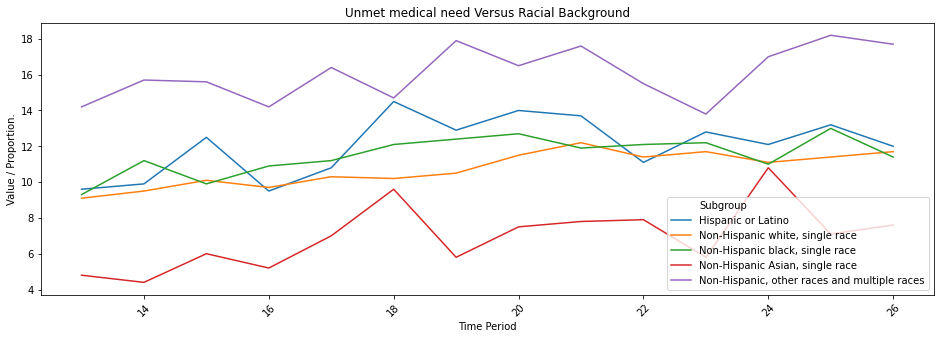

In [41]:
plt.figure(figsize= (16,5))
sns.lineplot(data= df_04, x="Time Period", y="Value", hue = 'Subgroup');
plt.title('Unmet medical need Versus Racial Background')
plt.ylabel('Value / Proportion.');
plt.xticks(rotation=45);

In [83]:
test_df = needy_df[(needy_df['Group']=='By Race/Hispanic ethnicity')|
                (needy_df['Group']== 'By Presence of Symptoms of Anxiety/Depression')]

In [89]:
test_df = test_df.drop(['Indicator', 'State', 'Phase', 
              'Time Period Label', 'Time Period Start Date',
             'Time Period End Date', 'Quartile Range', 'Suppression Flag'], axis = 1)

### Insurance Data

In [50]:
ins_df['Indicator'].unique()

array(['Uninsured at the Time of Interview',
       'Public Health Insurance Coverage',
       'Private Health Insurance Coverage'], dtype=object)

In [45]:
ins_df_00 = ins_df[(ins_df['Indicator']=='Uninsured at the Time of Interview') &
                    (ins_df['Group']=='By Age')         
                   ]

In [46]:
ins_df_01 = ins_df_00.groupby(['Time Period', 'Group', 'Subgroup']).agg({'Value': 'sum'}).reset_index()

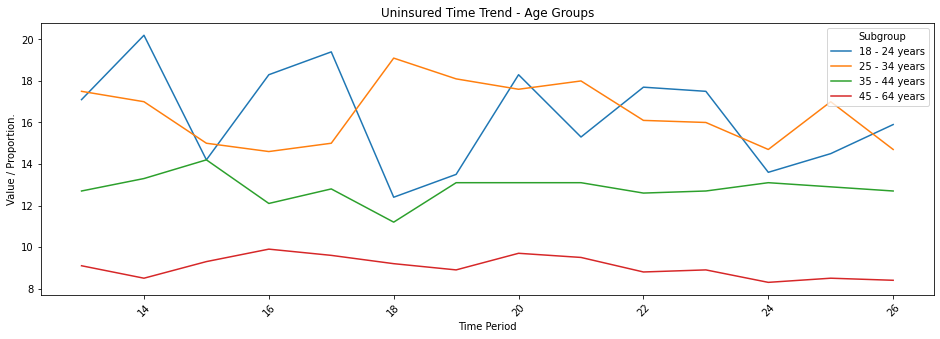

In [47]:
#plot
plt.figure(figsize= (16,5))
sns.lineplot(data= ins_df_01, x="Time Period", y="Value", hue="Subgroup");
plt.title('Uninsured Time Trend - Age Groups')
plt.ylabel('Value / Proportion.');
plt.xticks(rotation=45);

In [48]:
#unmet mental health needs in each time period 
time_table = df_00.groupby('Time Period').agg({'Value': 'sum'}).reset_index()
time_table = time_table.drop([0])

In [50]:
df_03 = time_table.merge(ins_df_01, left_on='Time Period', right_on='Time Period')

In [51]:
# Change the column names
df_03.columns =['Time Period', 'Unmet medical need', 'Group', 'Ages', 'Uninsured']
  
# Change the row indexes
#df.index = ['Row_1', 'Row_2', 'Row_3', 'Row_4']

In [52]:
df_03 =df_03.drop(['Group'], axis=1 )

In [53]:
plt_01 = df_03.groupby(['Time Period','Ages']).agg({'Unmet medical need': ['mean'], 'Uninsured': ['mean']})

In [66]:
plt_01_t = plt_01.T
plt_01_t

Time Period                        13                              \
Ages                    18 - 24 years 25 - 34 years 35 - 44 years   
Unmet medical need mean          55.8          55.8          55.8   
Uninsured          mean          17.1          17.5          12.7   

Time Period                                      14                \
Ages                    45 - 64 years 18 - 24 years 25 - 34 years   
Unmet medical need mean          55.8          60.6          60.6   
Uninsured          mean           9.1          20.2          17.0   

Time Period                                                    15  \
Ages                    35 - 44 years 45 - 64 years 18 - 24 years   
Unmet medical need mean          60.6          60.6          61.5   
Uninsured          mean          13.3           8.5          14.2   

Time Period                            ...            24                \
Ages                    25 - 34 years  ... 35 - 44 years 45 - 64 years   
Unmet medical need mean          61.5  ...          69.5          69.5   
Uninsured          mean          15.0  ...          13.1           8.3   

Time Period                        25                              \
Ages                    18 - 24 years 25 - 34 years 35 - 44 years   
Unmet medical need mean          72.4          72.4          72.4   
Uninsured          mean          14.5          17.0          12.9   

Time Period                                      26                \
Ages                    45 - 64 years 18 - 24 years 25 - 34 years   
Unmet medical need mean          72.4          73.6          73.6   
Uninsured          mean           8.5          15.9          14.7   

Time Period                                          
Ages                    35 - 44 years 45 - 64 years  
Unmet medical need mean          73.6          73.6  
Uninsured          mean          12.7           8.4  

[2 rows x 56 columns]

### Build the model

In [146]:
df_s = model_df[(model_df['Group'] == 'By State')]

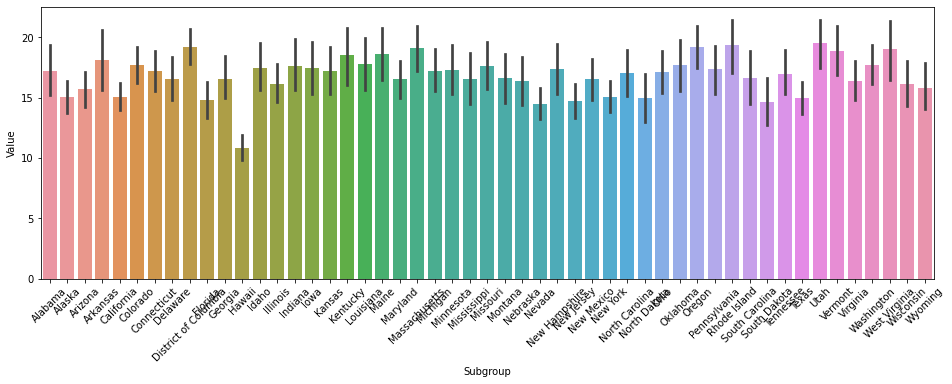

In [149]:
#plot
plt.figure(figsize= (16,5))
sns.barplot(x='Subgroup',y='Value',data= df_s);
plt.xticks(rotation=45);

### Encode the nominal variable

In [94]:
#hard code sex col into int val
import category_encoders as ce
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=['Indicator','Group','Subgroup'],return_df=True,use_cat_names=True)

In [115]:
model_df_00 = model_df[(model_df['Group'] == 'By Presence of Symptoms of Anxiety/Depression')|
                       (model_df['Group']=='By Race/Hispanic ethnicity')|
                    (model_df['Group']=='By Sex')         
                   ]

In [116]:
#Fit and transform Data
category_encoded = encoder.fit_transform(model_df_00)

### Encode the ordinal variables 

In [117]:
model_df_01 = model_df[(model_df['Group'] == 'By Education')|
                       (model_df['Group']=='By Age')        
                   ]

In [120]:
model_df_01['Subgroup'].unique()

array(['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years',
       '60 - 69 years', '70 - 79 years', '80 years and above',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher"],
      dtype=object)

In [129]:
# create object of Ordinalencoding
encoder_con = ce.OrdinalEncoder(cols=['Subgroup'],return_df=True,
                           mapping=[{'col':'Subgroup',
'mapping':{'18 - 29 years':1,'30 - 39 years':2,'40 - 49 years':3,'50 - 59 years':4,'60 - 69 years':5, 
          '70 - 79 years':6, '80 years and above':7, 'Less than a high school diploma':1, 'High school diploma or GED':2,
       "Some college/Associate's degree":3, "Bachelor's degree or higher":4}}
                                
                            ])

In [136]:
#fit and transform train data 
ordinal_encoded = encoder_con.fit_transform(model_df_01)
ordinal_encoded

,Indicator,Group,Subgroup,Time Period,Value,LowCI,HighCI,Confidence Interval
1,Took Prescription Medication for Mental Health...,By Age,1,13,18.7,17.2,20.3,17.2 - 20.3
2,Took Prescription Medication for Mental Health...,By Age,2,13,18.3,17.3,19.2,17.3 - 19.2
3,Took Prescription Medication for Mental Health...,By Age,3,13,20.4,19.5,21.3,19.5 - 21.3
4,Took Prescription Medication for Mental Health...,By Age,4,13,21.2,20.2,22.2,20.2 - 22.2
5,Took Prescription Medication for Mental Health...,By Age,5,13,19.7,18.7,20.7,18.7 - 20.7
6,Took Prescription Medication for Mental Health...,By Age,6,13,18.4,17.0,19.9,17.0 - 19.9
7,Took Prescription Medication for Mental Health...,By Age,7,13,13.8,11.0,17.0,11.0 - 17.0
17,Took Prescription Medication for Mental Health...,By Education,1,13,17.4,14.9,20.1,14.9 - 20.1
18,Took Prescription Medication for Mental Health...,By Education,2,13,18.1,17.2,19.1,17.2 - 19.1
19,Took Prescription Medication for Mental Health...,By Education,3,13,21.0,20.2,21.8,20.2 - 21.8


In [137]:
ordinal_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 4064
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Indicator            660 non-null    object 
 1   Group                660 non-null    object 
 2   Subgroup             660 non-null    int32  
 3   Time Period          660 non-null    int64  
 4   Value                611 non-null    float64
 5   LowCI                611 non-null    float64
 6   HighCI               611 non-null    float64
 7   Confidence Interval  611 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 60.0+ KB


In [152]:
indi_df = pd.read_csv('pulse2020_puf_20.csv')

In [154]:
indi_df.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,...,PSWHYCHG1,PSWHYCHG2,PSWHYCHG3,PSWHYCHG4,PSWHYCHG5,PSWHYCHG6,PSWHYCHG7,PSWHYCHG8,PSWHYCHG9,INCOME
0,V200000001S10011321410121,20,1,NaN,2,736.520259,1400.983870,1952,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,6
1,V200000001S18010774900121,20,1,NaN,2,1583.796907,3012.644787,1990,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88
2,V200000001S30011139410121,20,1,NaN,2,3874.760486,7370.438046,1984,2,1,...,-99,-99,-99,-99,1,-99,-99,1,-99,2
3,V200000001S37010002800111,20,49,NaN,4,1270.217462,4921.111795,1957,2,1,...,1,-99,-99,1,1,-99,-99,-99,-99,1
4,V200000001S51011678510111,20,1,NaN,2,1583.796907,3012.644787,1990,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


In [156]:
indi_df.columns

Index(['SCRAM', 'WEEK', 'EST_ST', 'EST_MSA', 'REGION', 'HWEIGHT', 'PWEIGHT',
       'TBIRTH_YEAR', 'ABIRTH_YEAR', 'EGENDER',
       ...
       'PSWHYCHG1', 'PSWHYCHG2', 'PSWHYCHG3', 'PSWHYCHG4', 'PSWHYCHG5',
       'PSWHYCHG6', 'PSWHYCHG7', 'PSWHYCHG8', 'PSWHYCHG9', 'INCOME'],
      dtype='object', length=188)

In [157]:
indi_df_00 = indi_df[['TBIRTH_YEAR', 'EGENDER', 'EEDUC', 'RRACE', 'RHISPANIC','ANXIOUS', 'WORRY','INTEREST','DOWN', 'DELAY', 'NOTGET',
                   'PRESCRIPT','MH_NOTGET']]

### Features Selections 
- TBIRTH_YEAR
    - Year of birth
- EGENDER
    - 1) Male 
    - 2) Female
- EEDUC
    - 1) Less than high school
    - 2) Some high school
    - 3) High school graduate or equivalent (for example GED)
    - 4) Some college, but degree not received or is in progress
    - 5) Associate’s degree (for example AA, AS)
    - 6) Bachelor's degree (for example BA, BS, AB)
    - 7) Graduate degree (for example master's, professional, doctorate)
- RRACE
    - 1) White, Alone
    - 2) Black, Alone
    - 3) Asian, Alone
    - 4) Any other race alone, or race in combination
    
- RHISPANIC
    - 1) No, not of Hispanic, Latino, or Spanish origin  
    - 2) Yes, of Hispanic, Latino, or Spanish origin

    1) Yes
    2) No
    99) Question seen but category not selected
    88) Missing / Did not report
    
- ANXIOUS
    - Frequency of anxiety over previous 7 days
- WORRY
    - Frequency of worry over previous 7 days
- INTEREST
    - Frequency of having little interest in things over previous 7 days
- DOWN
    - Frequency of feeling depressed over previous 7 days
- DELAY
    - Delayed medical care in last 4 weeks due to pandemic
- NOTGET
    - Delayed medical care for something not related to pandemic
- PRESCRIPT
    - Prescription mental health
- MH_NOTGET
    - Mental health not get
   